In [248]:
import pandas as pd
import numpy as np
import scipy
import operator as op
from functools import reduce
import random
import matplotlib.pyplot as plt

In [249]:
# v = probability of vaping indep of peer pressure
# sf = number of smoking friends
# sf_data = list of probilibities of having sf number of friends who smoke
# n = number of friends
# ii = income indexThe 

In [250]:
XfriendsSmoke = [.138,.131,.19,.195,.12,.225,0,0,0,0,0,0,0,0,0]
# XfriendsSmoke = [.338,.331,.39,.395,.32,.225,.225,.225,.225,.425,0,0,0,0,0]
# XfriendsSmoke = [.02,.06,.08,.11,.11,.17,.06,.06,.06,.27]
XfriendsTotal = [.02,.06,.08,.11,.11,.17,.06,.06,.06,.27]
# XfriendsTotal = [.01,.07,.13,.11,.11,.23,.06,.06,.06,.27]
# XfriendsTotal = [.04 ,.17,.15,.11,.11,.23,.06,.06,.06,.27]
GlobalProbOfVaping = .134092
# GlobalProbOfVaping = .26


In [251]:
def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer / denom

In [259]:
def PP(sf, n, ii):
    sxied = XfriendsSmoke[sf]
#     sxied = (ncr(n, sf) * pow(GlobalProbOfVaping, sf) * pow(1-GlobalProbOfVaping, n - sf))
    return (GlobalProbOfVaping * sxied) / (ncr(n, sf) * pow(GlobalProbOfVaping, sf) * pow(1-GlobalProbOfVaping, n - sf))

In [260]:
PplPerGeneration = 50000

iterations = 1

In [261]:
populationFriends = [[] for n in range(PplPerGeneration)]
populationVaping = [random.random()<GlobalProbOfVaping for n in range(PplPerGeneration)]

In [262]:
def iteration():
    global iterations
    for person in range(PplPerGeneration):
        fof = random.random()
        for xh in range(len(XfriendsTotal)):
            fof -= XfriendsTotal[xh]
            if fof < 0:
                friends = xh
        vapingfriends = 0
        for friendnum in range(friends):
            friend = random.randint(0,PplPerGeneration*iterations)
            if populationVaping[friend]:
                vapingfriends = vapingfriends + 1
        populationVaping.append(random.random()<PP(vapingfriends,friends,0))
    iterations += 1

In [263]:
def prop_vaping(populationVaping, iterations, pplPerGen):
        
    filthyVapers = 0
    for guy in range((iterations-1)*pplPerGen,iterations*pplPerGen):
        if populationVaping[guy]: filthyVapers += 1

    return float(filthyVapers)/(pplPerGen)

In [264]:
prop_over_time = []

prop_over_time.append(prop_vaping(populationVaping, iterations, PplPerGeneration))
for x in range(10):
    iteration()
    prop_over_time.append(prop_vaping(populationVaping, iterations, PplPerGeneration))

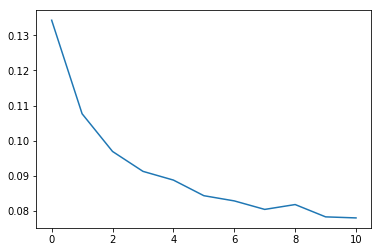

In [265]:
plt.plot(prop_over_time)